## 10 DBSCAN

### Introduction

Density Based Spatial Clustering of Applications with Noise (abbreviated as DBSCAN) is a density-based unsupervised clustering algorithm. In DBSCAN, clusters are formed from dense regions and separated by regions of no or low densities.

DBSCAN computes nearest neighbor graphs and creates arbitrary-shaped clusters in datasets (which may contain noise or outliers) as opposed to k-means clustering, which typically generates spherical-shaped clusters
Unlike k-means clustering, DBSCAN does not require specifying the number of clusters initially. However, DBSCAN requires two parameters viz. the radius of neighborhoods for a given data point p (eps or ε) and the minimum number of data points in a given ε-neighborhood to form clusters (minPts).

DBSCAN is also useful for clustering non-linear datasets.

- DBSCAN [DBSCAN](https://www.youtube.com/watch?v=RDZUdRSDOok)
- DBSCAN [DBSCAN vs Kmean](https://www.youtube.com/watch?v=8EvtpHeUwiw)

### Why do we need DBSCAN Clustering?

This is a pertinent question. We already have basic clustering algorithms, so why should you spend your time and energy learning about yet another clustering method? It’s a fair question so let me answer that before I talk about what DBSCAN clustering is.

First, let’s clear up the role of clustering.

Clustering is an unsupervised learning technique where we try to group the data points based on specific characteristics. There are various clustering algorithms with K-Means and Hierarchical being the most used ones. Some of the use cases of clustering algorithms include:

Document Clustering
Recommendation Engine
Image Segmentation
Market Segmentation
Search Result Grouping
and Anomaly Detection.
All these problems use the concept of clustering to reach their end goal. Therefore, it is crucial to understand the concept of clustering. But here’s the issue with these two clustering algorithms.

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.

Let’s try to understand it with an example. Here we have data points densely present in the form of concentric circles:



![Dim](figures/db2-1.webp)

We can see three different dense clusters in the form of concentric circles with some noise here. Now, let’s run K-Means and Hierarchical clustering algorithms and see how they cluster these data points.

![Dim](figures/db7-1.webp)

You might be wondering why there are four colors in the graph? As I said earlier, this data contains noise too, therefore, I have taken noise as a different cluster which is represented by the purple color. Sadly, both of them failed to cluster the data points. Also, they were not able to properly detect the noise present in the dataset. Now, let’s take a look at the results from DBSCAN clustering.

![Dim](figures/dbscan.png)

Awesome! DBSCAN is not just able to cluster the data points correctly, but it also perfectly detects noise in the dataset.

> It was proposed by Martin Ester et al. in 1996. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.

Here, we have some data points represented by grey color. Let’s see how DBSCAN clusters these data points.

![Dim](figures/db25.webp)

DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

![Dim](figures/db26.webp)

The above figure shows us a cluster created by DBCAN with minPoints = 3. Here, we draw a circle of equal radius epsilon around every data point. These two parameters help in creating spatial clusters.

All the data points with at least 3 points in the circle including itself are considered as Core points represented by red color. All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points. They are represented by yellow color. Finally, data points with no point other than itself present inside the circle are considered as Noise represented by the purple color.

For locating data points in space, DBSCAN uses Euclidean distance, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.

### Reachability and Connectivity

These are the two concepts that you need to understand before moving further. Reachability states if a data point can be accessed from another data point directly or indirectly, whereas Connectivity states whether two data points belong to the same cluster or not. In terms of reachability and connectivity, two points in DBSCAN can be referred to as:

Directly Density-Reachable
Density-Reachable
Density-Connected
Let’s understand what they are.

A point X is directly density-reachable from point Y w.r.t epsilon, minPoints if,

X belongs to the neighborhood of Y, i.e, dist(X, Y) <= epsilon
Y is a core point


![Dim](figures/db10.png)

Here, X is directly density-reachable from Y, but vice versa is not valid.

A point X is density-reachable from point Y w.r.t epsilon, minPoints if there is a chain of points p1, p2, p3, …, pn and p1=X and pn=Y such that pi+1 is directly density-reachable from pi.

![Dim](figures/db11.png)

Here, X is density-reachable from Y with X being directly density-reachable from P2, P2 from P3, and P3 from Y. But, the inverse of this is not valid.

A point X is density-connected from point Y w.r.t epsilon and minPoints if there exists a point O such that both X and Y are density-reachable from O w.r.t to epsilon and minPoints.

![Dim](figures/db12.png)

Here, both X and Y are density-reachable from O, therefore, we can say that X is density-connected from Y.

### Parameters

DBSCAN algorithm works with two parameters.

These parameters are:

- Epsilon (Eps): This is the least distance required for two points to be termed as a neighbor. This distance is known as Epsilon (Eps). Thus we consider Eps as a threshold for considering two points as neighbors, i.e., if the distance between two points is utmost Eps, then we consider the two points to be neighbors.

- MinPoints: This refers to the minimum number of points needed to construct a cluster. We consider MinPoints as a threshold for considering a cluster as a cluster. A cluster is only recognized if the number of points is greater than or equal to the MinPts.

We classify data points into three categories based on the two parameters above. So let us look at these categories.



### Types of data points in a DBSCAN clustering
After the DBSCAN clustering is complete, we end up with three types of data points as follows:

- Core: This is a point from which the two parameters above are fully defined, i.e., a point with at least Minpoints within the Eps distance from itself.
- Border: This is any data point that is not a core point, but it has at least one Core point within Eps distance from itself.
- Noise: This is a point with less than Minpoints within distance Eps from itself. Thus, it’s not a Core or a Border.
Let’s now look at the algorithmic steps of DBSCAN clustering.

In [1]:

# importing plotting library 
import matplotlib.pyplot as plt
# Create Sample data
from sklearn.datasets import make_moons
X, y= make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=20)
plt.scatter(x= X[:,0], y= X[:,1])

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
 
# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X))) > 1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,score,parameters
0,0.333368,eps:0.2 min_sample :3


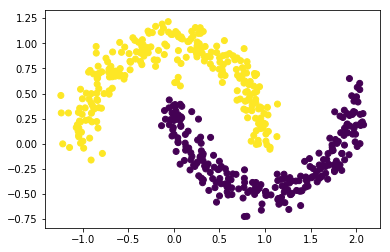

In [5]:

# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.18, min_samples=2)
# Plotting the clusters
plt.scatter(x= X[:,0], y= X[:,1], c=db.fit_predict(X))